# **Cycle Sharing Data Analysis**

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np

In [13]:
# importing datasets as dataframes

station = pd.read_csv('station.csv')
trip = pd.read_csv('trip.csv', on_bad_lines='skip')
weather = pd.read_csv('weather.csv', on_bad_lines='skip')

In [14]:
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [15]:
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [16]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [22]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [23]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286857 non-null  int64  
 1   starttime          286857 non-null  object 
 2   stoptime           286857 non-null  object 
 3   bikeid             286857 non-null  object 
 4   tripduration       286857 non-null  float64
 5   from_station_name  286857 non-null  object 
 6   to_station_name    286857 non-null  object 
 7   from_station_id    286857 non-null  object 
 8   to_station_id      286857 non-null  object 
 9   usertype           286857 non-null  object 
 10  gender             181557 non-null  object 
 11  birthyear          181553 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [39]:
trip['starttime'] = pd.to_datetime(trip['starttime'])

In [40]:
trip.starttime

0        2014-10-13 10:31:00
1        2014-10-13 10:32:00
2        2014-10-13 10:33:00
3        2014-10-13 10:34:00
4        2014-10-13 10:34:00
                 ...        
286852   2016-08-31 23:34:00
286853   2016-08-31 23:48:00
286854   2016-08-31 23:47:00
286855   2016-08-31 23:49:00
286856   2016-08-31 23:49:00
Name: starttime, Length: 286857, dtype: datetime64[ns]

In [41]:
trip['stoptime'] = pd.to_datetime(trip['stoptime'])

In [42]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286857 non-null  int64         
 1   starttime          286857 non-null  datetime64[ns]
 2   stoptime           286857 non-null  datetime64[ns]
 3   bikeid             286857 non-null  object        
 4   tripduration       286857 non-null  float64       
 5   from_station_name  286857 non-null  object        
 6   to_station_name    286857 non-null  object        
 7   from_station_id    286857 non-null  object        
 8   to_station_id      286857 non-null  object        
 9   usertype           286857 non-null  object        
 10  gender             181557 non-null  object        
 11  birthyear          181553 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 26.3+ MB


In [43]:
# droping the stoptime column since we already have a trip duration column in place
trip.drop(columns='stoptime',inplace=True,axis=1)

In [44]:
trip.head()

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [103]:
year = trip.starttime
def aged(year):
  age =[]
  for i in year.index:
    if i != np.nan:
      age.append(year[i].year)
    else:
      age.append(np.nan)
  return age


In [104]:
age = aged(year)

In [105]:
trip['age'] = age - trip.birthyear

In [106]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286857 non-null  int64         
 1   starttime          286857 non-null  datetime64[ns]
 2   bikeid             286857 non-null  object        
 3   tripduration       286857 non-null  float64       
 4   from_station_name  286857 non-null  object        
 5   to_station_name    286857 non-null  object        
 6   from_station_id    286857 non-null  object        
 7   to_station_id      286857 non-null  object        
 8   usertype           286857 non-null  object        
 9   gender             181557 non-null  object        
 10  birthyear          286857 non-null  float64       
 11  age                286857 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 26.3+ MB


In [98]:
trip.isnull().sum()

trip_id                   0
starttime                 0
bikeid                    0
tripduration              0
from_station_name         0
to_station_name           0
from_station_id           0
to_station_id             0
usertype                  0
gender               105300
birthyear            105304
age                  105304
dtype: int64

In [100]:
trip.fillna(value= {'birthyear' : trip['birthyear'].mean()},inplace=True)

In [101]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286857 non-null  int64         
 1   starttime          286857 non-null  datetime64[ns]
 2   bikeid             286857 non-null  object        
 3   tripduration       286857 non-null  float64       
 4   from_station_name  286857 non-null  object        
 5   to_station_name    286857 non-null  object        
 6   from_station_id    286857 non-null  object        
 7   to_station_id      286857 non-null  object        
 8   usertype           286857 non-null  object        
 9   gender             181557 non-null  object        
 10  birthyear          286857 non-null  float64       
 11  age                181553 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 26.3+ MB


In [102]:
trip.gender.value_counts()

Male      140564
Female     37562
Other       3431
Name: gender, dtype: int64

In [108]:
trip['gender'].ffill(inplace=True)

In [109]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286857 non-null  int64         
 1   starttime          286857 non-null  datetime64[ns]
 2   bikeid             286857 non-null  object        
 3   tripduration       286857 non-null  float64       
 4   from_station_name  286857 non-null  object        
 5   to_station_name    286857 non-null  object        
 6   from_station_id    286857 non-null  object        
 7   to_station_id      286857 non-null  object        
 8   usertype           286857 non-null  object        
 9   gender             286857 non-null  object        
 10  birthyear          286857 non-null  float64       
 11  age                286857 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 26.3+ MB


# **All the missing values have been cleaned**

In [110]:
trip.head(2)

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54.0
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44.0


<AxesSubplot:>

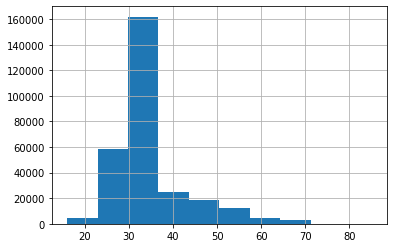

In [111]:
trip.age.hist()

# **Now Coming to the Station Dataset**

In [112]:
station.head(3)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN


In [113]:
station['from_station_id'] = station['station_id']
station['to_station_id'] = station.station_id

In [114]:
station.head(3)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,from_station_id,to_station_id
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN,BT-01,BT-01
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN,BT-03,BT-03
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN,BT-04,BT-04


In [115]:
fromStation = station[['lat','long','from_station_id']]

In [116]:
fromStation.head()

,lat,long,from_station_id
0,47.618418,-122.350964,BT-01
1,47.615829,-122.348564,BT-03
2,47.616094,-122.341102,BT-04
3,47.613110,-122.344208,BT-05
4,47.610731,-122.332447,CBD-03


##### **Now merging the two datasets**

In [117]:
trip2 = pd.merge(trip,fromStation,on='from_station_id')

In [118]:
trip2.head(4)

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age,lat,long
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54.0,47.60595,-122.335768
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44.0,47.60595,-122.335768
2,433,2014-10-13 10:33:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26.0,47.60595,-122.335768
3,434,2014-10-13 10:34:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,37.0,47.60595,-122.335768


In [119]:
trip2.columns

Index(['trip_id', 'starttime', 'bikeid', 'tripduration', 'from_station_name',
       'to_station_name', 'from_station_id', 'to_station_id', 'usertype',
       'gender', 'birthyear', 'age', 'lat', 'long'],
      dtype='object')

In [120]:
toStation = station[['lat','long','to_station_id']]

In [121]:
trip3 = pd.merge(trip2,toStation,on='to_station_id')

In [122]:
trip3.head()

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age,lat_x,long_x,lat_y,long_y
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54.0,47.60595,-122.335768,47.600757,-122.332946
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44.0,47.60595,-122.335768,47.600757,-122.332946
2,433,2014-10-13 10:33:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26.0,47.60595,-122.335768,47.600757,-122.332946
3,434,2014-10-13 10:34:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,37.0,47.60595,-122.335768,47.600757,-122.332946
4,435,2014-10-13 10:34:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,43.0,47.60595,-122.335768,47.600757,-122.332946


In [125]:
trip3.rename(columns={'lat_x':'from_lat',
                    'long_x':'from_long',
                    'lat_y':'to_lat',
                    'long_y':'to_long'},inplace=True)

In [126]:
trip3.head()

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age,from_lat,from_long,to_lat,to_long
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54.0,47.60595,-122.335768,47.600757,-122.332946
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44.0,47.60595,-122.335768,47.600757,-122.332946
2,433,2014-10-13 10:33:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26.0,47.60595,-122.335768,47.600757,-122.332946
3,434,2014-10-13 10:34:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,37.0,47.60595,-122.335768,47.600757,-122.332946
4,435,2014-10-13 10:34:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,43.0,47.60595,-122.335768,47.600757,-122.332946


### **For the dataset to be complete, we need to include the weather data**

##### **But first let's take a look at where the bike stations are.**

In [129]:
# Folium is the library that allows plotting with maps, very simple to use

import folium

In [130]:
mapa = folium.Map(location=[ 47.608013,  -122.335167], zoom_start=12) # Determining the seattle map using latitude and longitude data
lat = station['lat'].values # taking the latitude values from the stations of the dataset station
long = station['long'].values # taking the values of longitude of the stations of the dataset station

for la, lo in zip(lat, long): # for each value in lat and long...
    folium.Marker([la, lo]).add_to(mapa) # create a marker and place in the map variable (which in this case is the map of Seattle)
mapa # Show the Map

### **Lets see the 10 most popular stations on the map**

In [132]:
most_popular = pd.DataFrame(trip3.from_station_name.value_counts().head(10))

In [133]:
most_popular = most_popular.reset_index()

In [134]:
most_popular

,index,from_station_name
0,Pier 69 / Alaskan Way & Clay St,13054
1,E Pine St & 16th Ave,11390
2,3rd Ave & Broad St,10934
3,2nd Ave & Pine St,10049
4,Westlake Ave & 6th Ave,9994
5,E Harrison St & Broadway Ave E,9639
6,Cal Anderson Park / 11th Ave & Pine St,9468
7,REI / Yale Ave N & John St,8382
8,2nd Ave & Vine St,8168
9,15th Ave E & E Thomas St,7678


In [135]:
most_popular.columns = ['from_station_name','Count']

In [136]:
most_popular.head()

,from_station_name,Count
0,Pier 69 / Alaskan Way & Clay St,13054
1,E Pine St & 16th Ave,11390
2,3rd Ave & Broad St,10934
3,2nd Ave & Pine St,10049
4,Westlake Ave & 6th Ave,9994


In [141]:
# station2 = station[['name','lat','long']]
station2.columns = ['from_station_name','lat', 'long']

In [142]:
most_popular = pd.merge(most_popular,station2,on='from_station_name')

In [143]:
most_popular.head()

,from_station_name,Count,lat,long
0,Pier 69 / Alaskan Way & Clay St,13054,47.614315,-122.354093
1,E Pine St & 16th Ave,11390,47.615330,-122.311752
2,3rd Ave & Broad St,10934,47.618418,-122.350964
3,2nd Ave & Pine St,10049,47.610185,-122.339641
4,Westlake Ave & 6th Ave,9994,47.613628,-122.337341


In [146]:
mapa2 = folium.Map(location=[47.608013,  -122.335167], zoom_start=13) # Same process as above, but we need to create a new Map

lat = most_popular['lat'] 
long = most_popular['long'] 

# This time I wrote line by line because I wanted to include the name of the station on the map. I could not find a more practical way to do it,
# for a while...

folium.Marker([47.614315, -122.354093],popup='Pier 69 / Alaskan Way & Clay St').add_to(mapa2)
folium.Marker([47.615330 ,-122.311752],popup='E Pine St & 16th Ave').add_to(mapa2)
folium.Marker([47.618418 ,-122.350964],popup='3rd Ave & Broad St ').add_to(mapa2)
folium.Marker([47.610185 ,-122.339641],popup='2nd Ave & Pine St').add_to(mapa2)
folium.Marker([47.613628 ,-122.337341],popup='Westlake Ave & 6th Ave').add_to(mapa2)
folium.Marker([47.622063 ,-122.321251],popup='E Harrison St & Broadway Ave E ').add_to(mapa2)
folium.Marker([47.615486 ,-122.318245],popup='Cal Anderson Park / 11th Ave & Pine St').add_to(mapa2)
folium.Marker([47.619859 ,-122.330304],popup='REI / Yale Ave N & John St ').add_to(mapa2)
folium.Marker([47.615829 ,-122.348564],popup='2nd Ave & Vine St').add_to(mapa2)
folium.Marker([47.620712 ,-122.312805],popup='15th Ave E & E Thomas St').add_to(mapa2)

mapa2

In [147]:
weather.head(4)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain


In [148]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [149]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,2014-10-14,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,2014-10-15,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,2014-10-16,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,2014-10-17,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [150]:
trip3.head(3)

,trip_id,starttime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age,from_lat,from_long,to_lat,to_long
0,431,2014-10-13 10:31:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54.0,47.60595,-122.335768,47.600757,-122.332946
1,432,2014-10-13 10:32:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44.0,47.60595,-122.335768,47.600757,-122.332946
2,433,2014-10-13 10:33:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26.0,47.60595,-122.335768,47.600757,-122.332946


In [152]:
trip3['Date'] = trip2['starttime'].apply(lambda x: str(x).split(' ')[0])

In [153]:
trip3.Date.head()

0    2014-10-13
1    2014-10-13
2    2014-10-13
3    2014-10-13
4    2014-10-13
Name: Date, dtype: object

In [155]:
trip3.Date = pd.to_datetime(trip3['Date'])

In [159]:
trip4 = pd.merge(trip3,weather,on='Date')

In [161]:
trip4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286833 entries, 0 to 286832
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     286833 non-null  int64         
 1   starttime                   286833 non-null  datetime64[ns]
 2   bikeid                      286833 non-null  object        
 3   tripduration                286833 non-null  float64       
 4   from_station_name           286833 non-null  object        
 5   to_station_name             286833 non-null  object        
 6   from_station_id             286833 non-null  object        
 7   to_station_id               286833 non-null  object        
 8   usertype                    286833 non-null  object        
 9   gender                      286833 non-null  object        
 10  birthyear                   286833 non-null  float64       
 11  age                         286833 non-

In [162]:
trip4=pd.DataFrame()

In [163]:
trip4 = pd.merge(weather,trip3,on='Date')

In [164]:
trip4.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,from_station_id,to_station_id,usertype,gender,birthyear,age,from_lat,from_long,to_lat,to_long
0,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,CBD-06,PS-04,Member,Male,1960.0,54.0,47.60595,-122.335768,47.600757,-122.332946
1,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,CBD-06,PS-04,Member,Male,1970.0,44.0,47.60595,-122.335768,47.600757,-122.332946
2,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,CBD-06,PS-04,Member,Female,1988.0,26.0,47.60595,-122.335768,47.600757,-122.332946
3,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,CBD-06,PS-04,Member,Female,1977.0,37.0,47.60595,-122.335768,47.600757,-122.332946
4,2014-10-13,71,62.0,54,55,51,46,87,68,46,...,CBD-06,PS-04,Member,Male,1971.0,43.0,47.60595,-122.335768,47.600757,-122.332946


In [165]:
trip4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286833 entries, 0 to 286832
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        286833 non-null  datetime64[ns]
 1   Max_Temperature_F           286833 non-null  int64         
 2   Mean_Temperature_F          286723 non-null  float64       
 3   Min_TemperatureF            286833 non-null  int64         
 4   Max_Dew_Point_F             286833 non-null  int64         
 5   MeanDew_Point_F             286833 non-null  int64         
 6   Min_Dewpoint_F              286833 non-null  int64         
 7   Max_Humidity                286833 non-null  int64         
 8   Mean_Humidity               286833 non-null  int64         
 9   Min_Humidity                286833 non-null  int64         
 10  Max_Sea_Level_Pressure_In   286833 non-null  float64       
 11  Mean_Sea_Level_Pressure_In  286833 non-

Now that we have made a gigantic dataset with 37 columns so i am going to delete some unwanted columns

In [166]:
trip4.drop(columns=['trip_id','bikeid','Max_Gust_Speed_MPH'],inplace=True)

In [167]:
trip4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286833 entries, 0 to 286832
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        286833 non-null  datetime64[ns]
 1   Max_Temperature_F           286833 non-null  int64         
 2   Mean_Temperature_F          286723 non-null  float64       
 3   Min_TemperatureF            286833 non-null  int64         
 4   Max_Dew_Point_F             286833 non-null  int64         
 5   MeanDew_Point_F             286833 non-null  int64         
 6   Min_Dewpoint_F              286833 non-null  int64         
 7   Max_Humidity                286833 non-null  int64         
 8   Mean_Humidity               286833 non-null  int64         
 9   Min_Humidity                286833 non-null  int64         
 10  Max_Sea_Level_Pressure_In   286833 non-null  float64       
 11  Mean_Sea_Level_Pressure_In  286833 non-

#### **Cleaning the columns that were merged from weather dataframe**

In [168]:
# finding missing values

trip4.isnull().sum()

Date                               0
Max_Temperature_F                  0
Mean_Temperature_F               110
Min_TemperatureF                   0
Max_Dew_Point_F                    0
MeanDew_Point_F                    0
Min_Dewpoint_F                     0
Max_Humidity                       0
Mean_Humidity                      0
Min_Humidity                       0
Max_Sea_Level_Pressure_In          0
Mean_Sea_Level_Pressure_In         0
Min_Sea_Level_Pressure_In          0
Max_Visibility_Miles               0
Mean_Visibility_Miles              0
Min_Visibility_Miles               0
Max_Wind_Speed_MPH                 0
Mean_Wind_Speed_MPH                0
Precipitation_In                   0
Events                        170310
starttime                          0
tripduration                       0
from_station_name                  0
to_station_name                    0
from_station_id                    0
to_station_id                      0
usertype                           0
g

In [169]:
# Mean_Temperature_F has 110 null values

trip4.Mean_Temperature_F.fillna(value = np.random.randint(48,68),inplace=True)

In [171]:
trip4.Mean_Temperature_F.isnull().sum()

0

In [175]:
# Events column has alot of null values 

trip4[trip4['Events'].isnull()] = 'Not an Event'

In [176]:
trip4.isnull().sum()

Date                          0
Max_Temperature_F             0
Mean_Temperature_F            0
Min_TemperatureF              0
Max_Dew_Point_F               0
MeanDew_Point_F               0
Min_Dewpoint_F                0
Max_Humidity                  0
Mean_Humidity                 0
Min_Humidity                  0
Max_Sea_Level_Pressure_In     0
Mean_Sea_Level_Pressure_In    0
Min_Sea_Level_Pressure_In     0
Max_Visibility_Miles          0
Mean_Visibility_Miles         0
Min_Visibility_Miles          0
Max_Wind_Speed_MPH            0
Mean_Wind_Speed_MPH           0
Precipitation_In              0
Events                        0
starttime                     0
tripduration                  0
from_station_name             0
to_station_name               0
from_station_id               0
to_station_id                 0
usertype                      0
gender                        0
birthyear                     0
age                           0
from_lat                      0
from_lon

### **Data has been comletely cleaned**